# K2c02 Summary Statistics for YSO Sample
##  Calculate the summary statistics for the K2 C2 control sample lightcurves
Michael Gully-Santiago  
January-February 2016

Here we are looking at everything in K2 Cycle 2 that is was NOT among the 1678 sources proposed to be YSOs.

We do everything else identically to the YSO sample.

**The result is a $N\sim2000 \times 12 $ dataset of summary statistics for each K2 C2 lightcurve.**  
The columns are identical to the YSO dataset.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 
from astropy.utils.console import ProgressBar
import warnings

### List all the file names.  
There's a wget script in the `control/data` directory that will automatically fetch each file.

In [4]:
#!ls ../control/data > control_file_list.csv

In [14]:
file_list_raw = pd.read_csv('control_file_list.csv', names=['fname'])
file_list = file_list_raw.fname.values

### Compute the descriptive statistics for all $\sim2000$ control sample lightcurves from K2 Cycle 02.  

In [20]:
columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
agg_data = pd.DataFrame(columns=columns)

n_files = len(file_list)

Old way of doing things, before we cleaned it up:

```python
with ProgressBar(n_files, ipython_widget=True) as bar:
    for i in range(n_files):
        bar.update()
        file = file_list[i]
        raw_lc = pd.read_csv(file, index_col=False)
        agg_data.loc[i] = raw_lc[' Corrected Flux'].describe()
```

In [21]:
cln_data = pd.DataFrame(columns=columns)

In [25]:
file

'hlsp_k2sff_k2_lightcurve_202483641-c02_kepler_v1_llc-default-aper.txt'

In [30]:
with ProgressBar(n_files, ipython_widget=True) as bar:
    for i in range(n_files):
        bar.update()
        file = file_list[i]
        raw_lc = pd.read_csv('../control/data/'+file, index_col=False)
        subset_i = (raw_lc['BJD - 2454833'] > 2063.0) & (raw_lc['BJD - 2454833'] < 2102.0)
        cln_data.loc[i] = raw_lc[' Corrected Flux'][subset_i].describe()

In [31]:
agg_data = cln_data

In [32]:
agg_data['fname'] = file_list_raw.fname
agg_data['EPIC_ID'] = agg_data['fname'].str[41:41+9]

In [33]:
agg_data.head(3)

,count,mean,std,min,25%,50%,75%,max,fname,EPIC_ID
0,1705,0.988004,0.033483,0.909843,0.963780,0.987292,1.008944,1.249504,hlsp_k2sff_k2_lightcurve_202483641-c02_kepler_...,pler_v1_l
1,1598,0.999278,0.000963,0.997441,0.998445,0.998952,1.000181,1.002337,hlsp_k2sff_k2_lightcurve_202488467-c02_kepler_...,pler_v1_l
2,1631,0.997483,0.004618,0.990222,0.993479,0.996373,1.001445,1.007639,hlsp_k2sff_k2_lightcurve_202491250-c02_kepler_...,pler_v1_l


### Add columns, save, and merge.

HACK!  Only do this if you have already gone through saving all the notebooks.

In [34]:
agg_data['logstd'] = np.log10(agg_data['std'])
agg_data['logiqr'] = np.log10(agg_data['75%']-agg_data['25%'])

oh wait, nevermind, we never cross-matched the control sample with any other source.

In [36]:
ad = agg_data.dropna()
ad.to_csv('../analysis/K2C02_control_CLN_data.csv', index=False)

In [37]:
#ad_clean = agg_data
#ad_dirty = pd.read_csv('../analysis/K2C02_')

### Plots

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


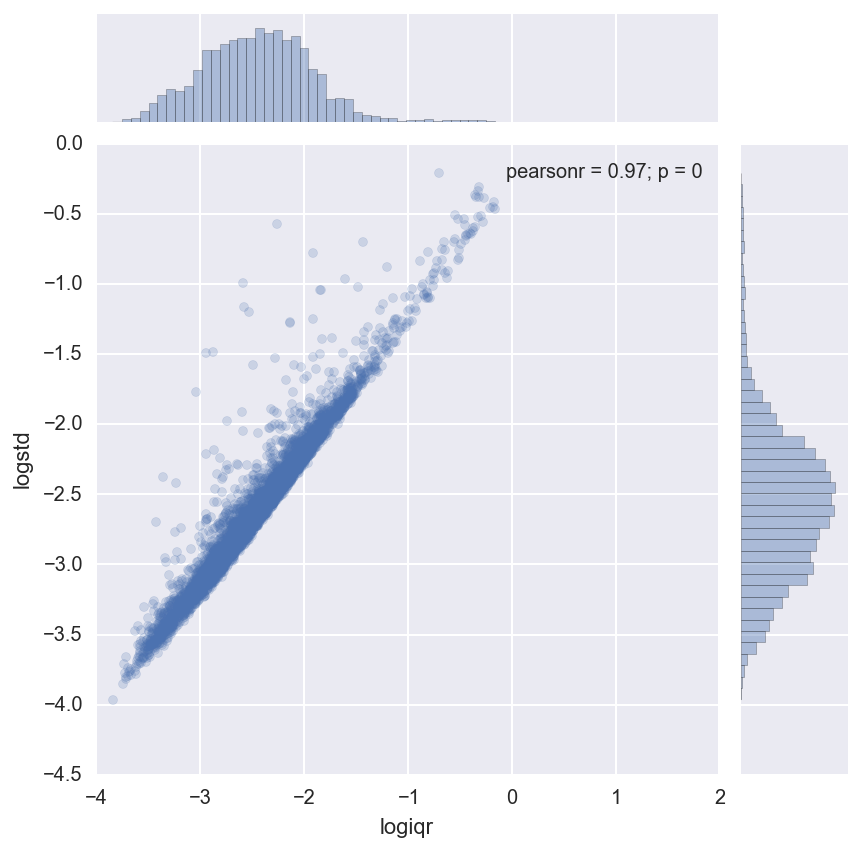

In [38]:
tp = sns.jointplot(x="logiqr", y="logstd", alpha=0.2, kind='scatter',data=agg_data, xlim=(-4, 2));

The scatter of standard deviation above the interquartile range reflects sources with extra flicker noise beyond just secular sinusoidal variation.

In [39]:
ad = agg_data.dropna()
agg_data.shape, ad.shape

((4655, 12), (4655, 12))

None of the lightcurves habe `NaN` values.  That's nice.

# Save the control sample as `.csv`, just like the YSO sample.

In [40]:
new_col_order = ['EPIC_ID','count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'logstd', 'logiqr','fname']

In [41]:
ad = ad[new_col_order]
ad.head(2)

,EPIC_ID,count,mean,std,min,25%,50%,75%,max,logstd,logiqr,fname
0,pler_v1_l,1705,0.988004,0.033483,0.909843,0.963780,0.987292,1.008944,1.249504,-1.475178,-1.345202,hlsp_k2sff_k2_lightcurve_202483641-c02_kepler_...
1,pler_v1_l,1598,0.999278,0.000963,0.997441,0.998445,0.998952,1.000181,1.002337,-3.016318,-2.760327,hlsp_k2sff_k2_lightcurve_202488467-c02_kepler_...


In [42]:
ad.to_csv('../analysis/K2C02_control_agg_data.csv', index=False)

# The end.